In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from scipy.stats import mannwhitneyu as mwu

Size of gene sets.

In [43]:
gene_set_sizes=None
for dname in ['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']:
    data=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname,sep=',',header=0,index_col=0)
    data=pd.DataFrame(data['Set'].value_counts())
    data['Name']=data.index
    data['Database']=dname
    gene_set_sizes=pd.concat([gene_set_sizes,data])

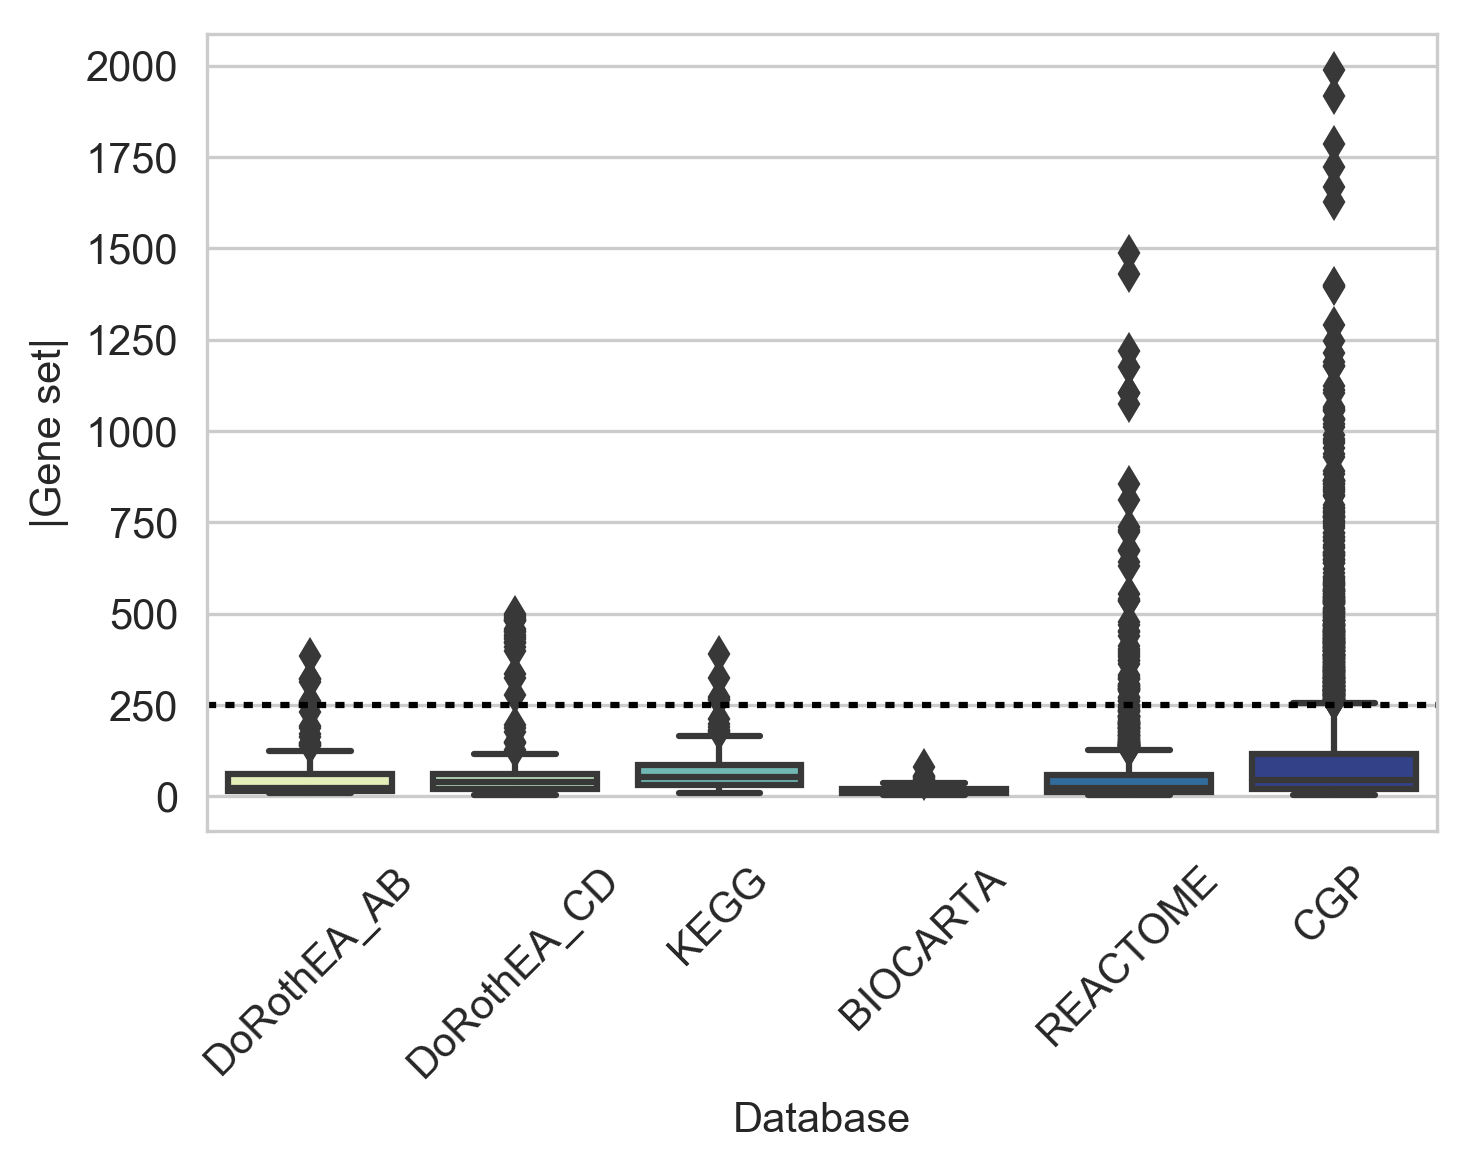

In [44]:
sns.set_palette('YlGnBu',6)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(y='Set',x='Database',data=gene_set_sizes)
plt.plot([-0.5,5.5],[250,250],':k')
plt.ylabel('|Gene set|')
plt.xticks(range(6),['DoRothEA_AB','DoRothEA_CD','KEGG','BIOCARTA','REACTOME','CGP'],rotation=45)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1.pdf')

Gene set similarity

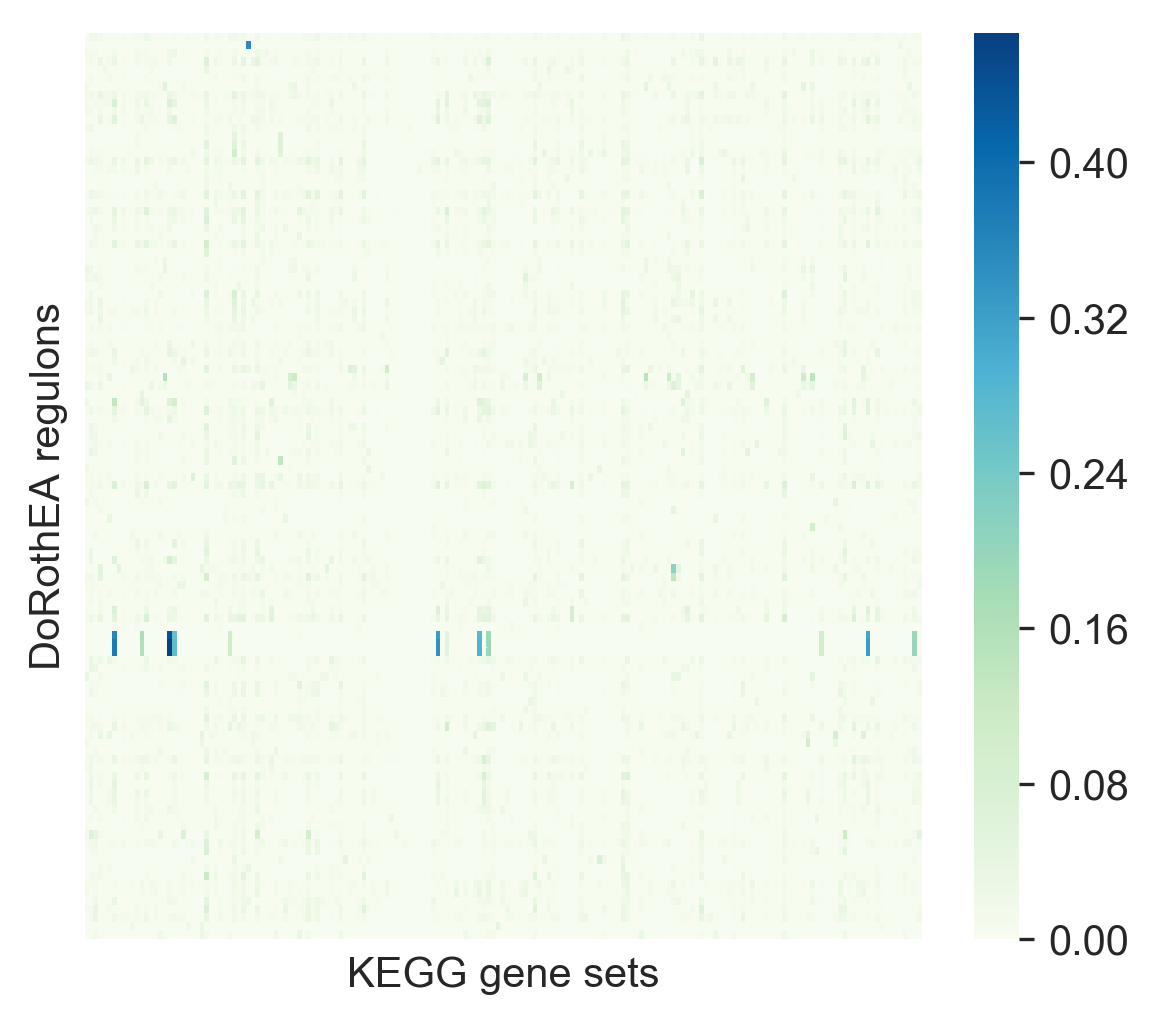

In [45]:
data=pd.read_csv('../results/similarity/BEST_dorothea_AB_filtered_KEGG_filtered_jaccard.csv',
                 sep=',',header=0,index_col=0)
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data,cmap='GnBu')
plt.xticks([])
plt.yticks([])
plt.xlabel('KEGG gene sets')
plt.ylabel('DoRothEA regulons')
plt.savefig('../figures/raw/Fig2A.pdf')

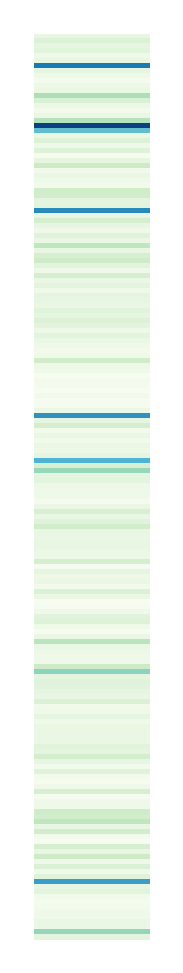

In [46]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(0)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai1.pdf')

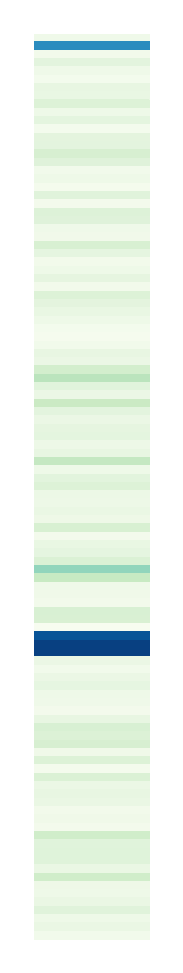

In [47]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(1)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai2.pdf')

Gene set similarity distribution

In [48]:
dname1='BEST_dorothea_CD'
metric='jaccard'

In [69]:
def make_similarity_distribution(fname,dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=False):
    similarities=pd.DataFrame(columns=['Database','Similarity','Random'])
    for dname2 in ['KEGG','BIOCARTA','REACTOME','CGP']:
        #readl
        data=pd.read_csv('../results/similarity/%s_filtered_%s_filtered_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim1=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim1['Database']=dname2
        max_sim1['Similarity']=data
        max_sim1['Random']='Real'
        similarities=pd.concat([similarities,max_sim1])
        #random
        data=pd.read_csv('../results/similarity/%s_filtered_%s_random_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim2=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim2['Database']=dname2
        max_sim2['Similarity']=data
        max_sim2['Random']='Random'
        similarities=pd.concat([similarities,max_sim2])

        print(dname1,dname2,mwu(max_sim1['Similarity'],max_sim2['Similarity']))
    sns.set_palette('YlGnBu',2)
    plt.figure(figsize=(5,4),dpi=300)
    sns.boxplot(x='Database',y='Similarity',hue='Random',data=similarities,)
    if metric=='jaccard':
        plt.ylabel('Jaccard index')
    else:
        plt.ylabel('Overlap coefficient')
    if force_ylim:
        plt.ylim(0,1.0)
    plt.tight_layout()
    plt.savefig('../figures/raw/'+fname)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


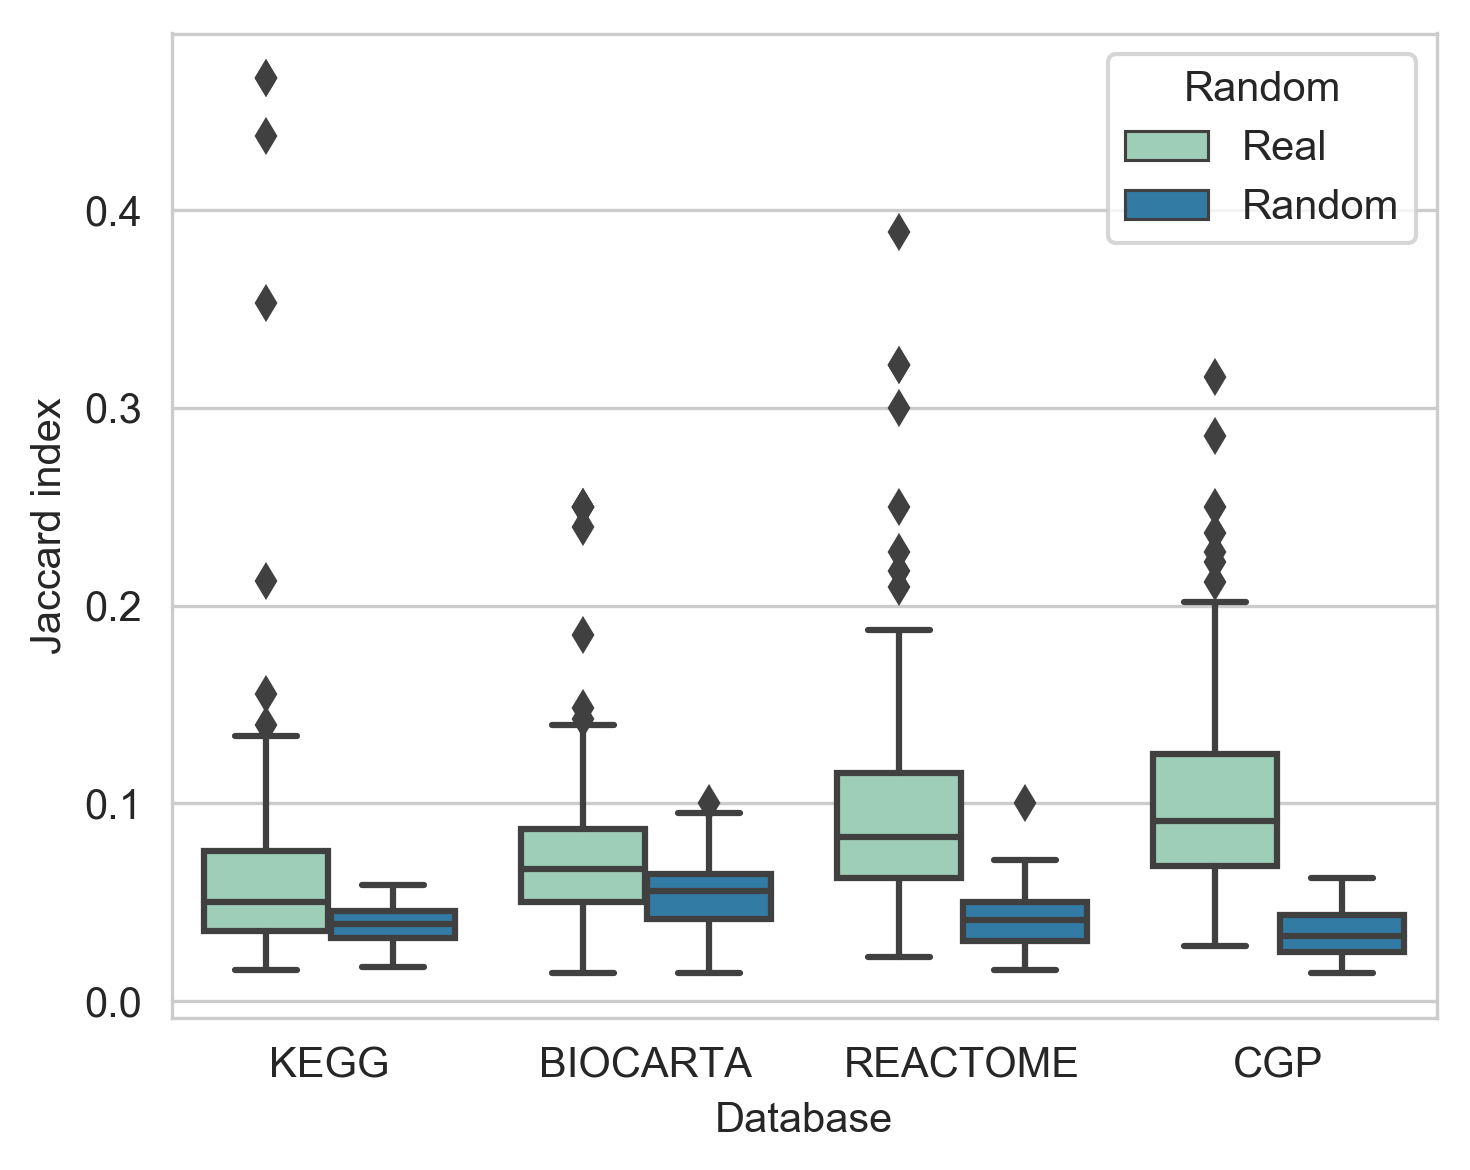

In [70]:
make_similarity_distribution('Fig2B.pdf')

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


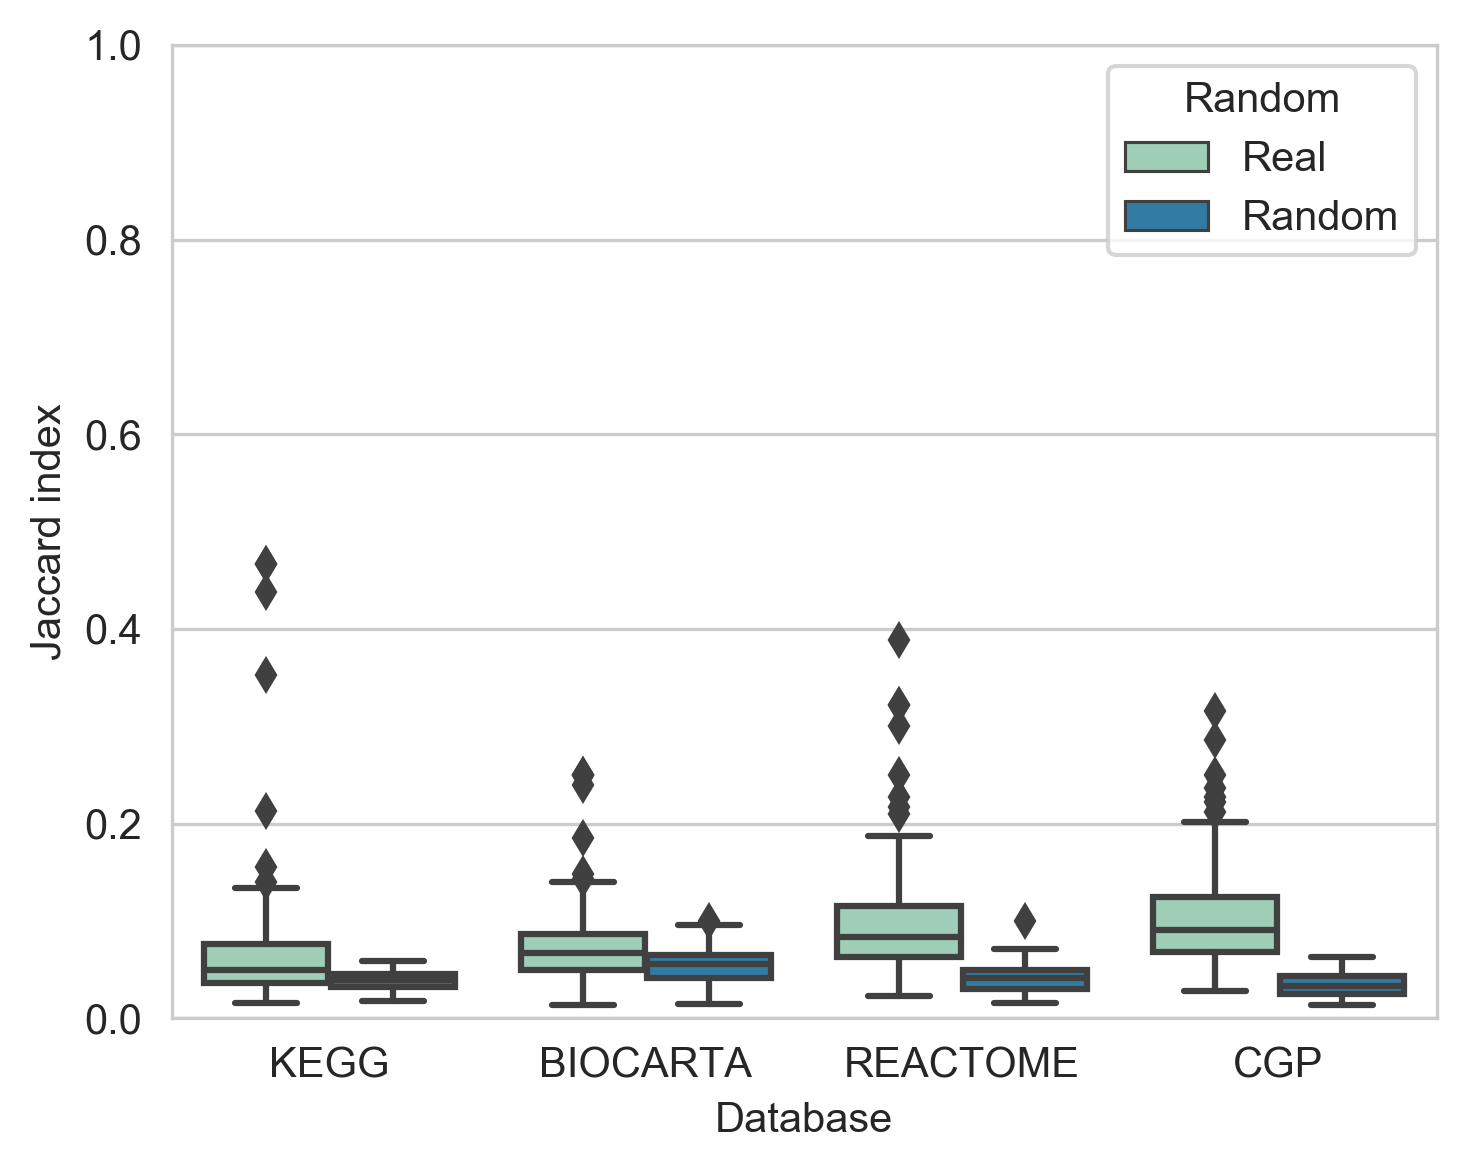

In [71]:
make_similarity_distribution('SFig2A.pdf',dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=True)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3220.0, pvalue=2.5218968221402894e-09)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=4997.0, pvalue=0.020534276748425517)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=855.5, pvalue=1.120069377082686e-28)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=261.5, pvalue=1.315089708967561e-34)


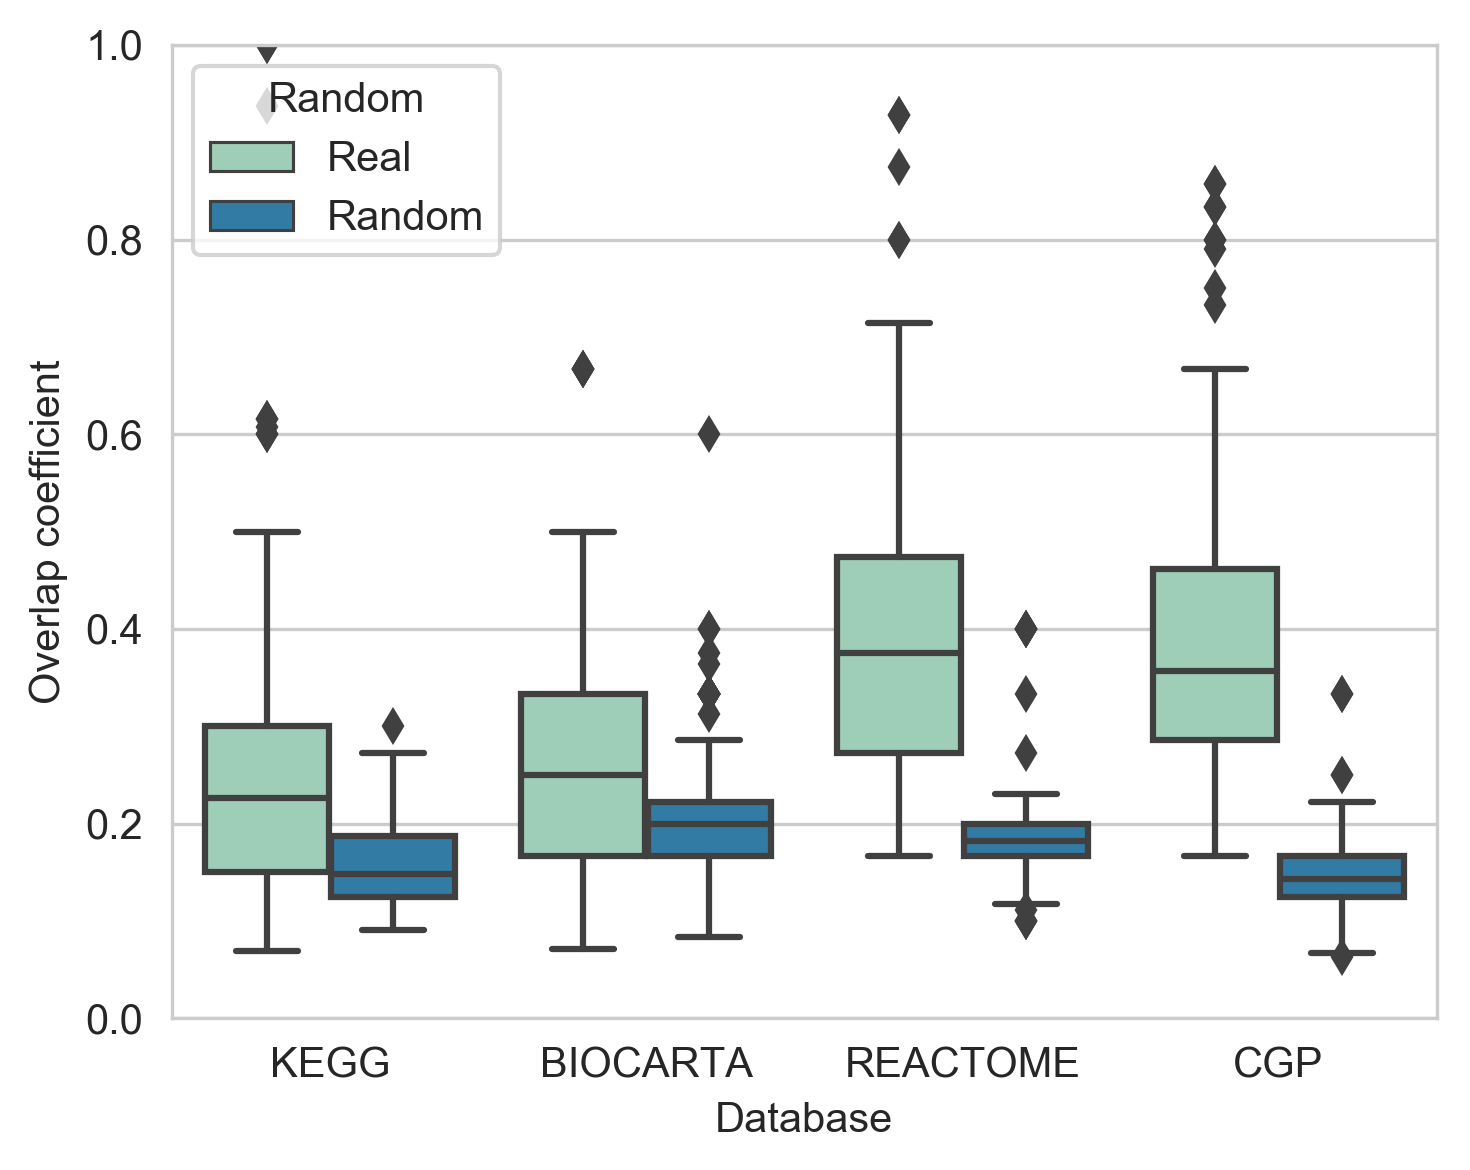

In [72]:
make_similarity_distribution('SFig2B.pdf',dname1='BEST_dorothea_AB',metric='overlap',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=26066.0, pvalue=0.001059444645452985)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=29125.5, pvalue=0.1214983383094177)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=19920.5, pvalue=2.5818771707499164e-12)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9899.0, pvalue=9.348774978947948e-40)


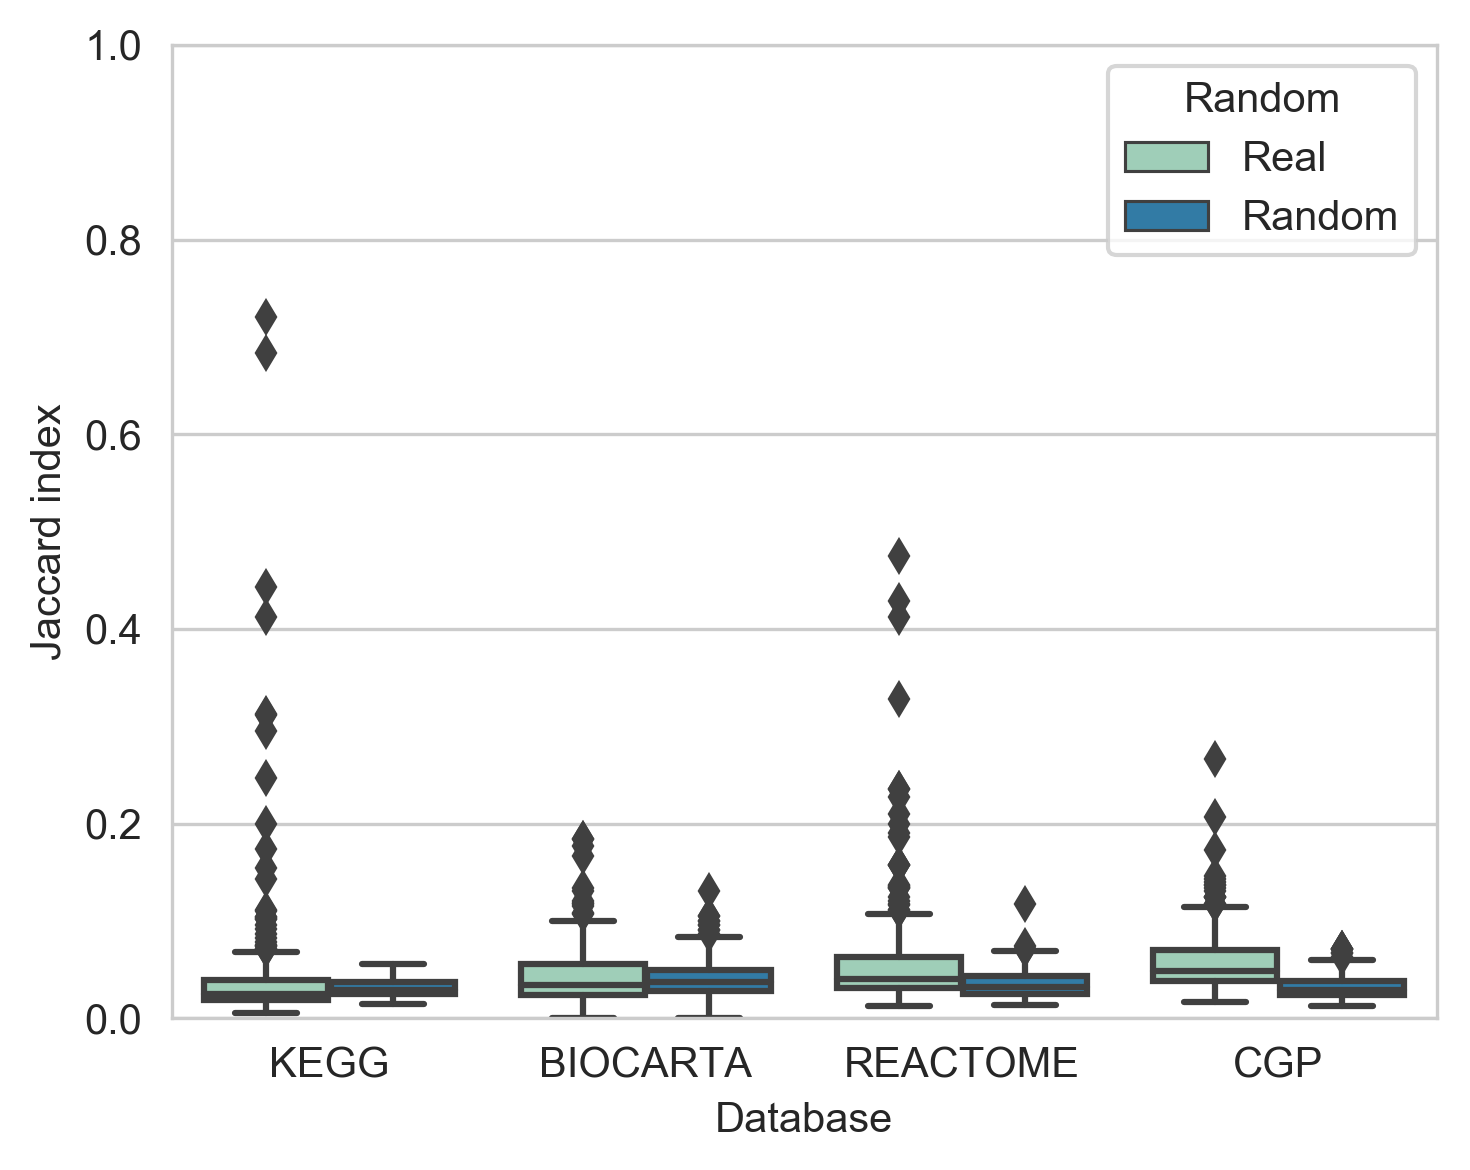

In [73]:
make_similarity_distribution('SFig2C.pdf',dname1='BEST_dorothea_CD',metric='jaccard',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=25948.0, pvalue=0.0008091049757990906)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=28088.5, pvalue=0.03289285384830791)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=16050.0, pvalue=2.331663257730446e-23)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9247.5, pvalue=5.14375156094892e-43)


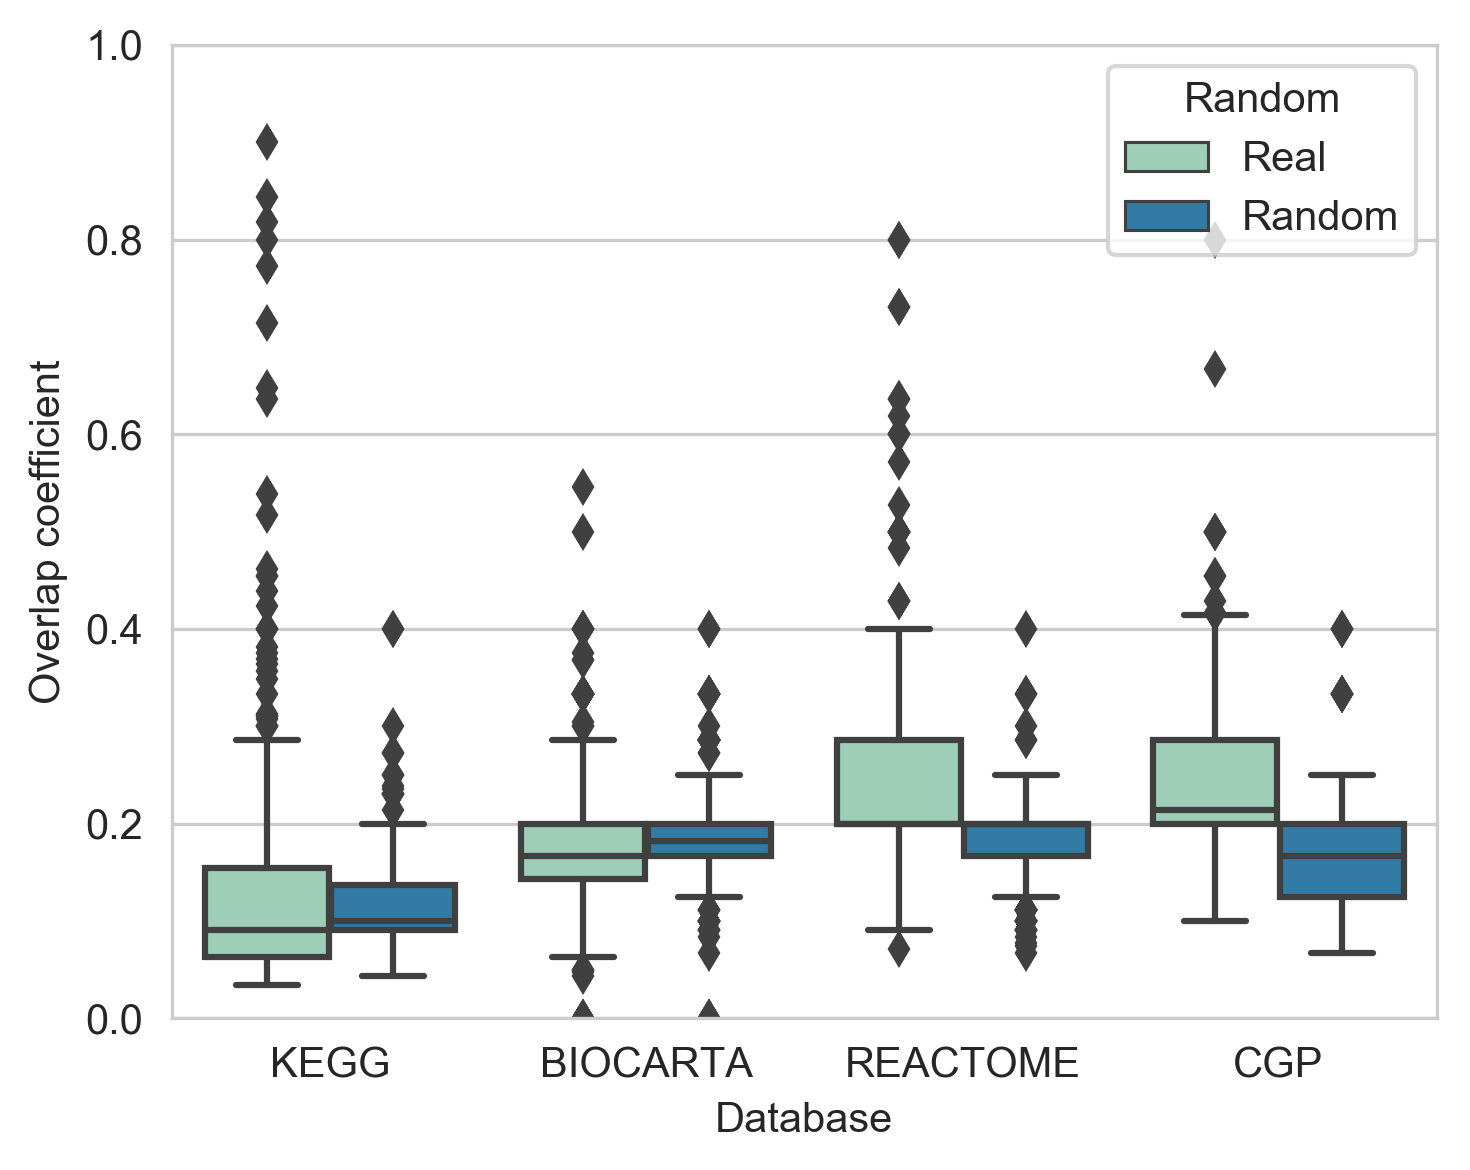

In [74]:
make_similarity_distribution('SFig2D.pdf',dname1='BEST_dorothea_CD',metric='overlap',force_ylim=True)

Shortest path distance

In [77]:
DM=pd.read_csv('../data/omnipath/DM_GC.csv',sep=',',header=0,index_col=0)
AM=pd.read_csv('../data/omnipath/AM_GC.csv',sep=',',header=0,index_col=0)

In [80]:
degree=(AM.sum()-1).astype(int)
degree_dict={}
for i in range(1,degree.max()+1):
    fil=degree==i
    degree_dict[i]=degree.index[fil]

In [118]:
def make_distance_distribution(fname,set_name='BEST_DoRothEA_AB',lab_name='DoRothEA'):
    gene_sets=pd.read_csv('../results/genesets/single/csvs/%s_filtered.csv' % set_name,
                          sep=',',header=0,index_col=0)
    #overlap with DM
    fil=np.in1d(gene_sets['Gene'],DM.index)
    gene_sets=gene_sets[fil]
    distances=[]
    bg=[]
    for gene_set in gene_sets['Set'].unique():
        fil=gene_sets['Set']==gene_set
        genes=gene_sets[fil]['Gene'].unique()
        if len(genes)>1:
            distances+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
            degree_counts=degree[genes].value_counts()
            genes=[]
            for d in degree_counts.index:
                genes+=list(np.random.choice(degree_dict[d],degree_counts[d],False))
            bg+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('YlGnBu',3)
    plt.hist([DM.values[np.triu_indices_from(DM,1)],bg,distances],normed=True)
    plt.xlabel('Shortest path distance')
    plt.ylabel('Density')
    plt.xlim(1,10)
    plt.legend(['all distances','degree matched background',lab_name+ ' distances'])
    plt.savefig('../figures/raw/'+fname)
    print('p value vs. all distances:',mwu(DM.values[np.triu_indices_from(DM,1)],distances))
    print('p value vs. bg distances:',mwu(bg,distances))

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9534279550.5, pvalue=0.0)


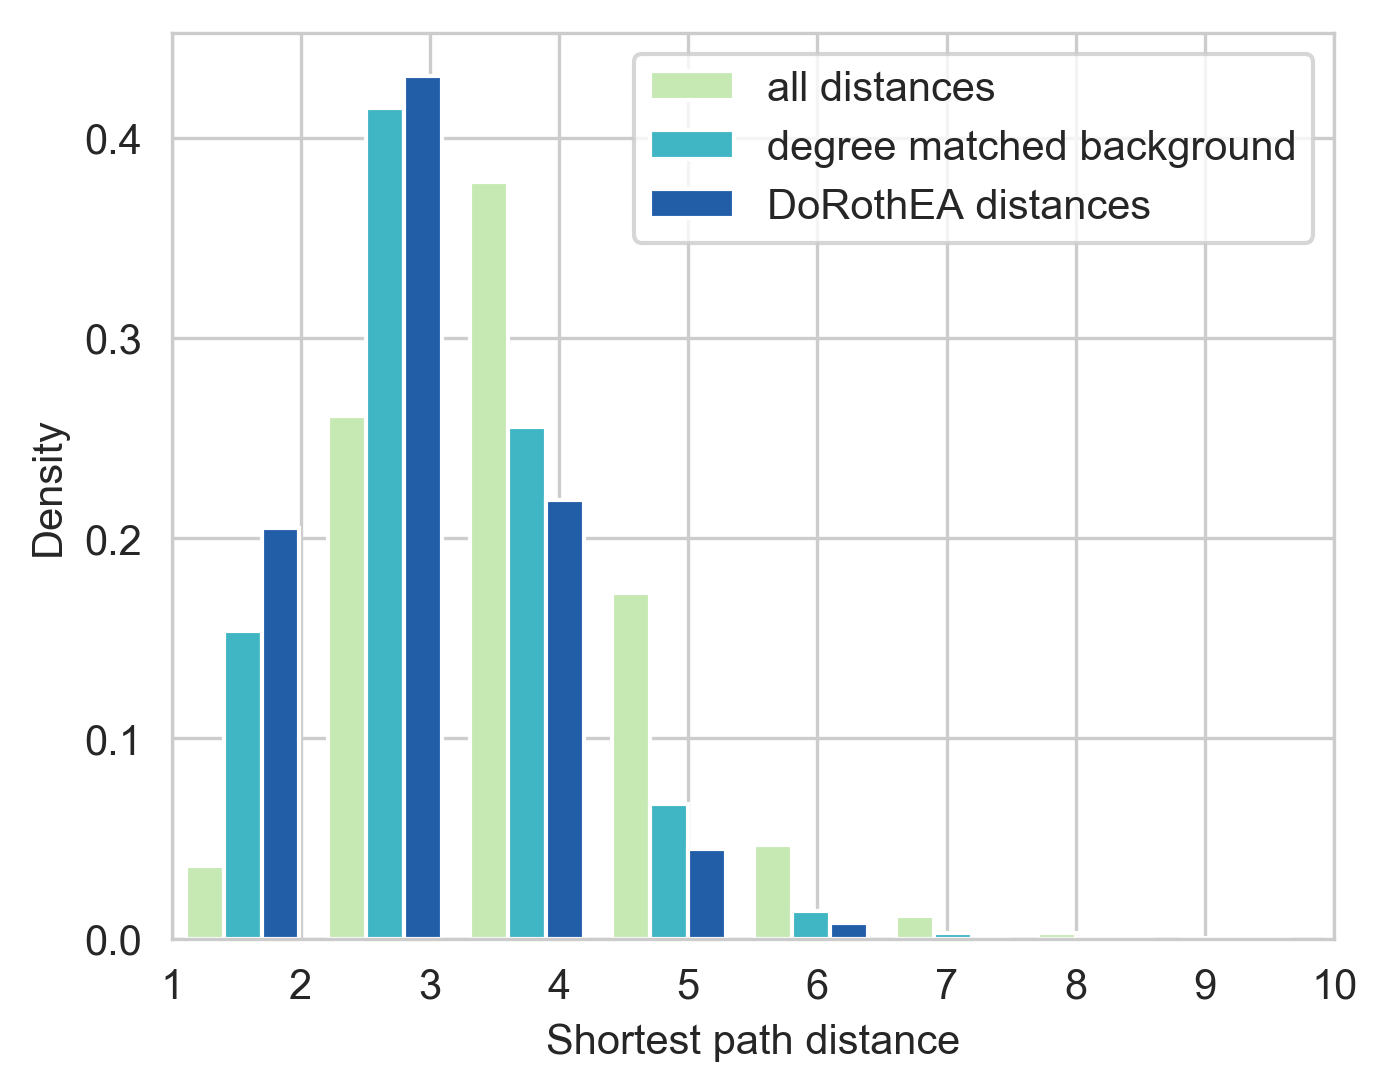

In [119]:
make_distance_distribution('Fig2C.pdf')

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9621477243.5, pvalue=0.0)


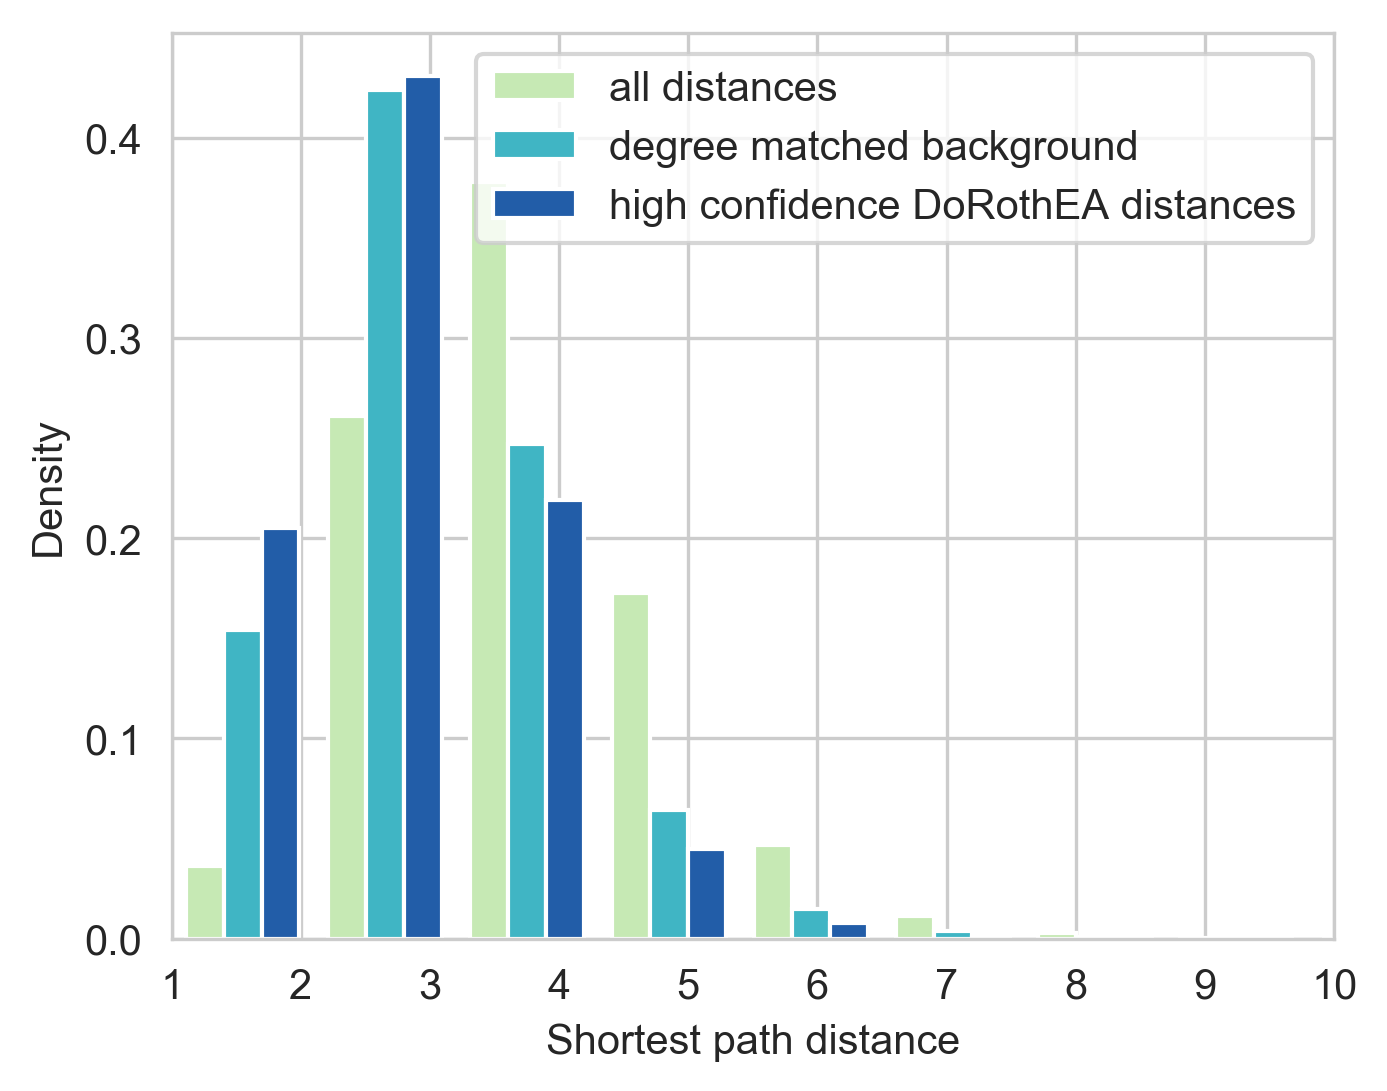

In [122]:
make_distance_distribution('SFig3A.pdf',set_name='BEST_DoRothEA_AB',lab_name='high confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=1875202701318.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8588397534.5, pvalue=0.0)


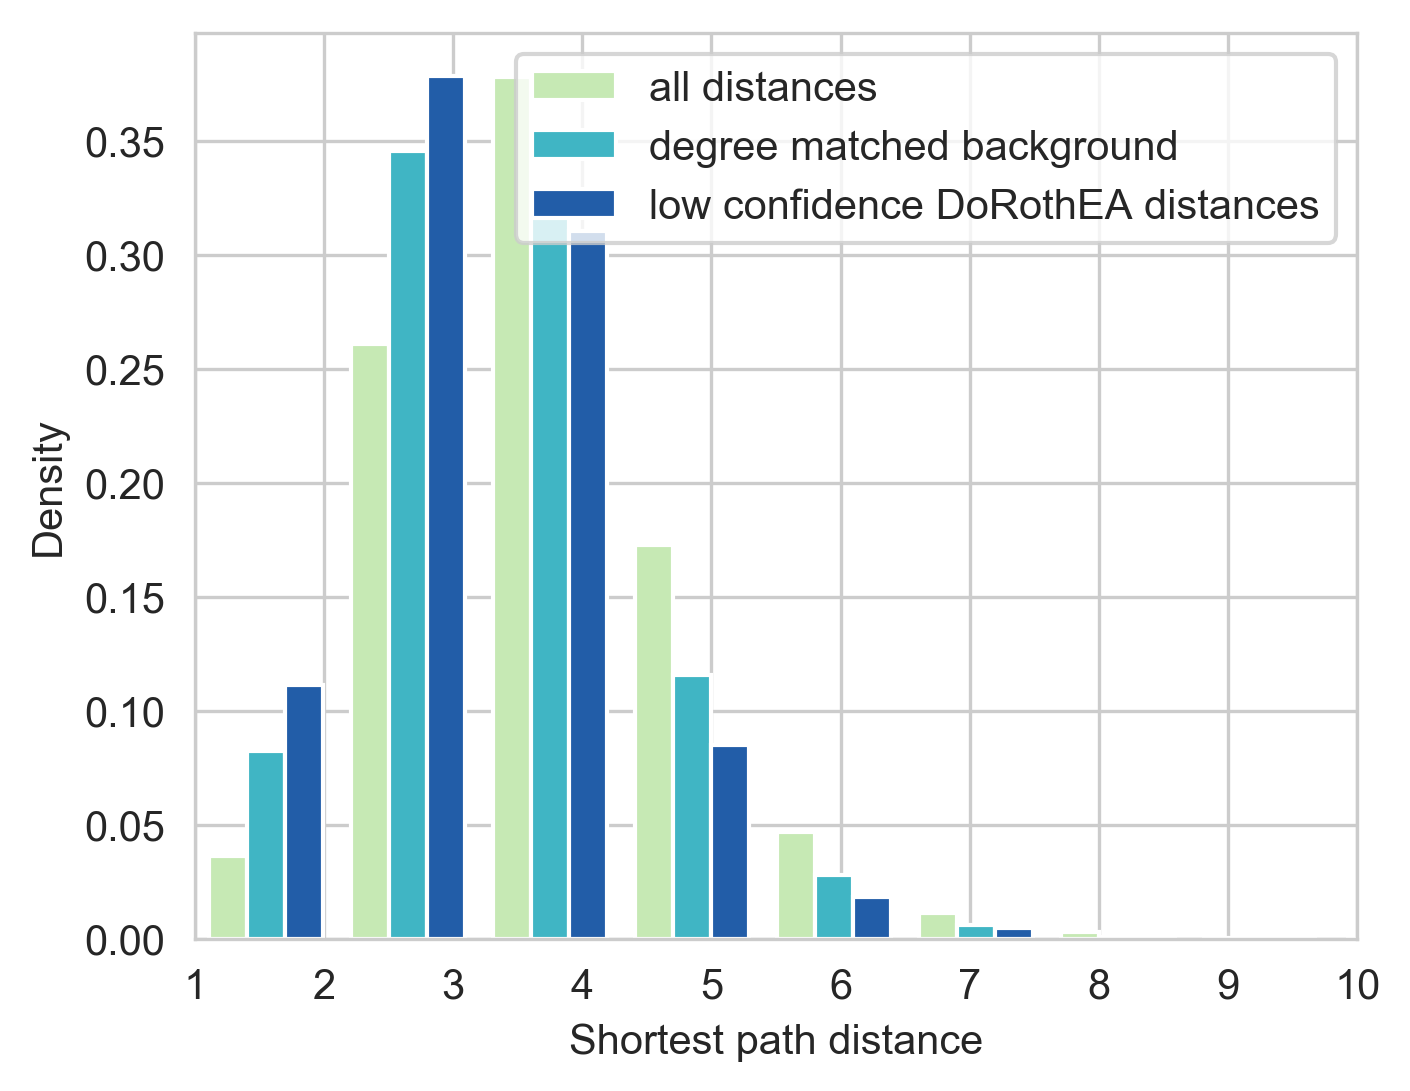

In [123]:
make_distance_distribution('SFig3B.pdf',set_name='BEST_DoRothEA_CD',lab_name='low confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=3004285610259.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=55209633449.0, pvalue=0.0)


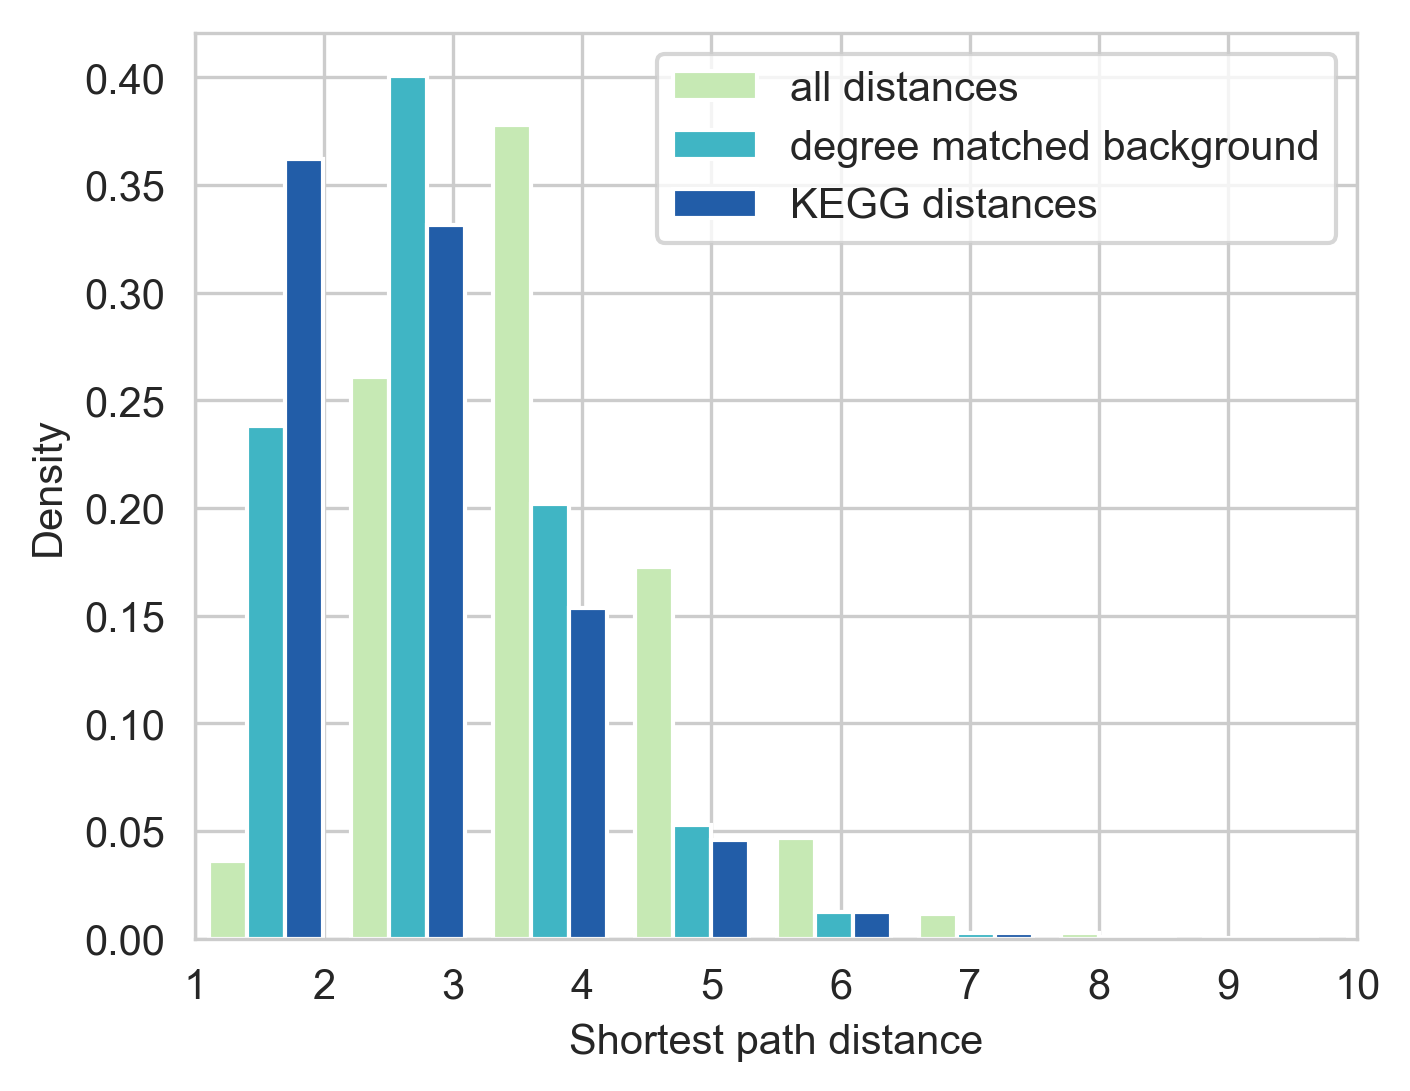

In [124]:
make_distance_distribution('SFig3C.pdf',set_name='KEGG',lab_name='KEGG')

p value vs. all distances: MannwhitneyuResult(statistic=148364150091.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=827976822.5, pvalue=0.0)


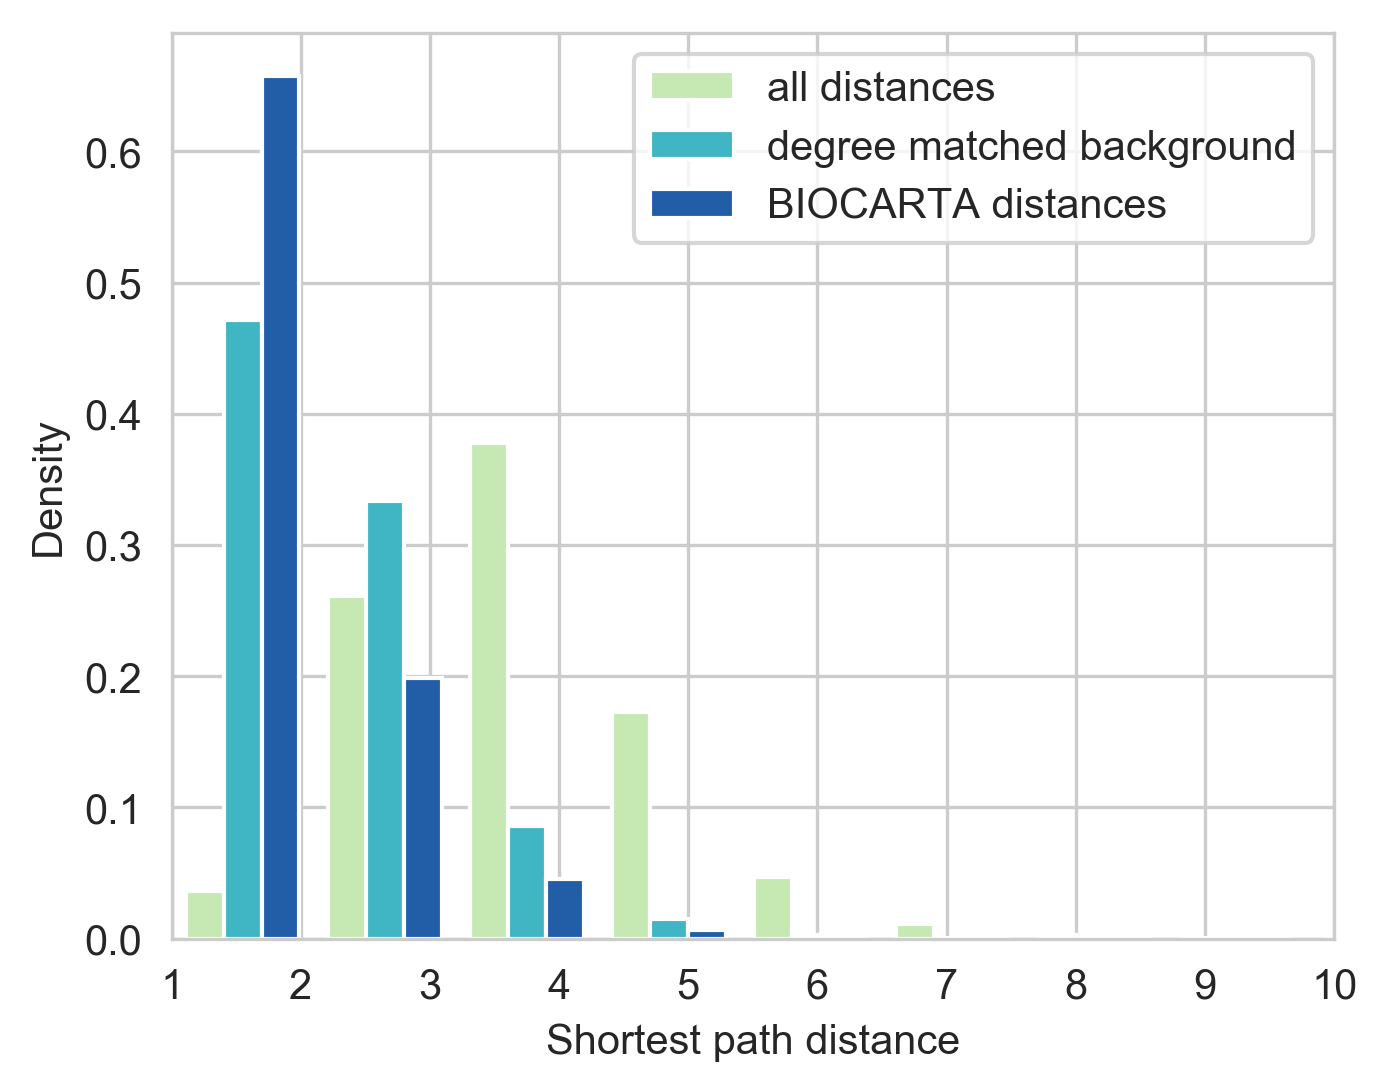

In [128]:
make_distance_distribution('SFig3D.pdf',set_name='BIOCARTA',lab_name='BIOCARTA')

p value vs. all distances: MannwhitneyuResult(statistic=12792509248376.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=790719361316.5, pvalue=0.0)


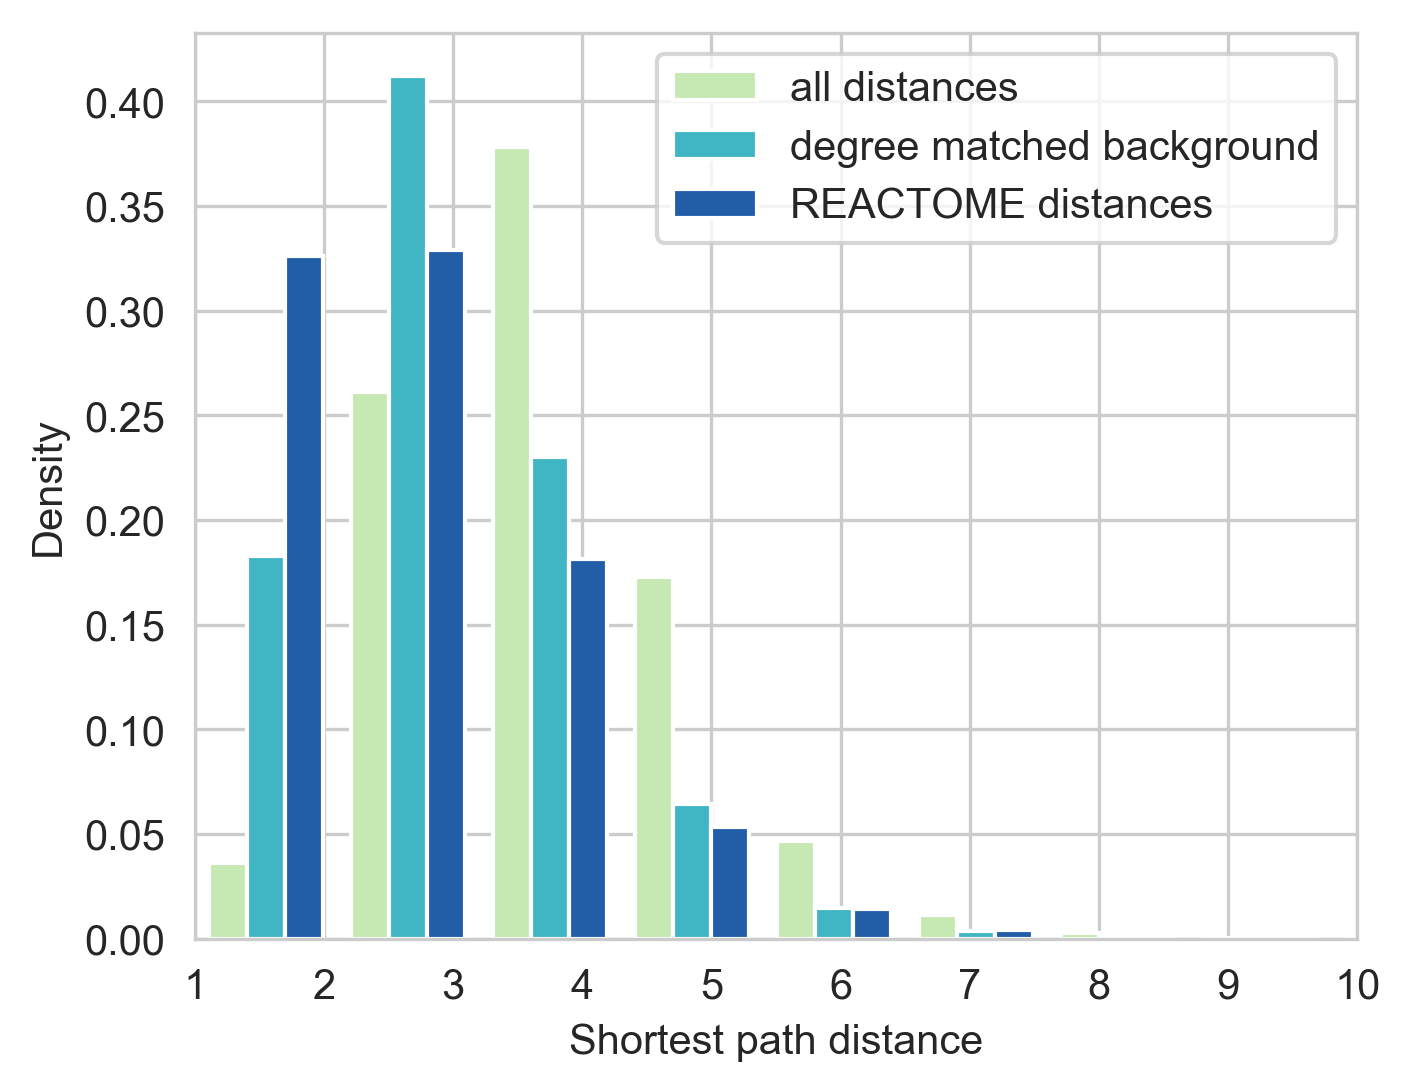

In [129]:
make_distance_distribution('SFig3E.pdf',set_name='REACTOME',lab_name='REACTOME')

p value vs. all distances: MannwhitneyuResult(statistic=62225351048753.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8544221811389.5, pvalue=0.0)


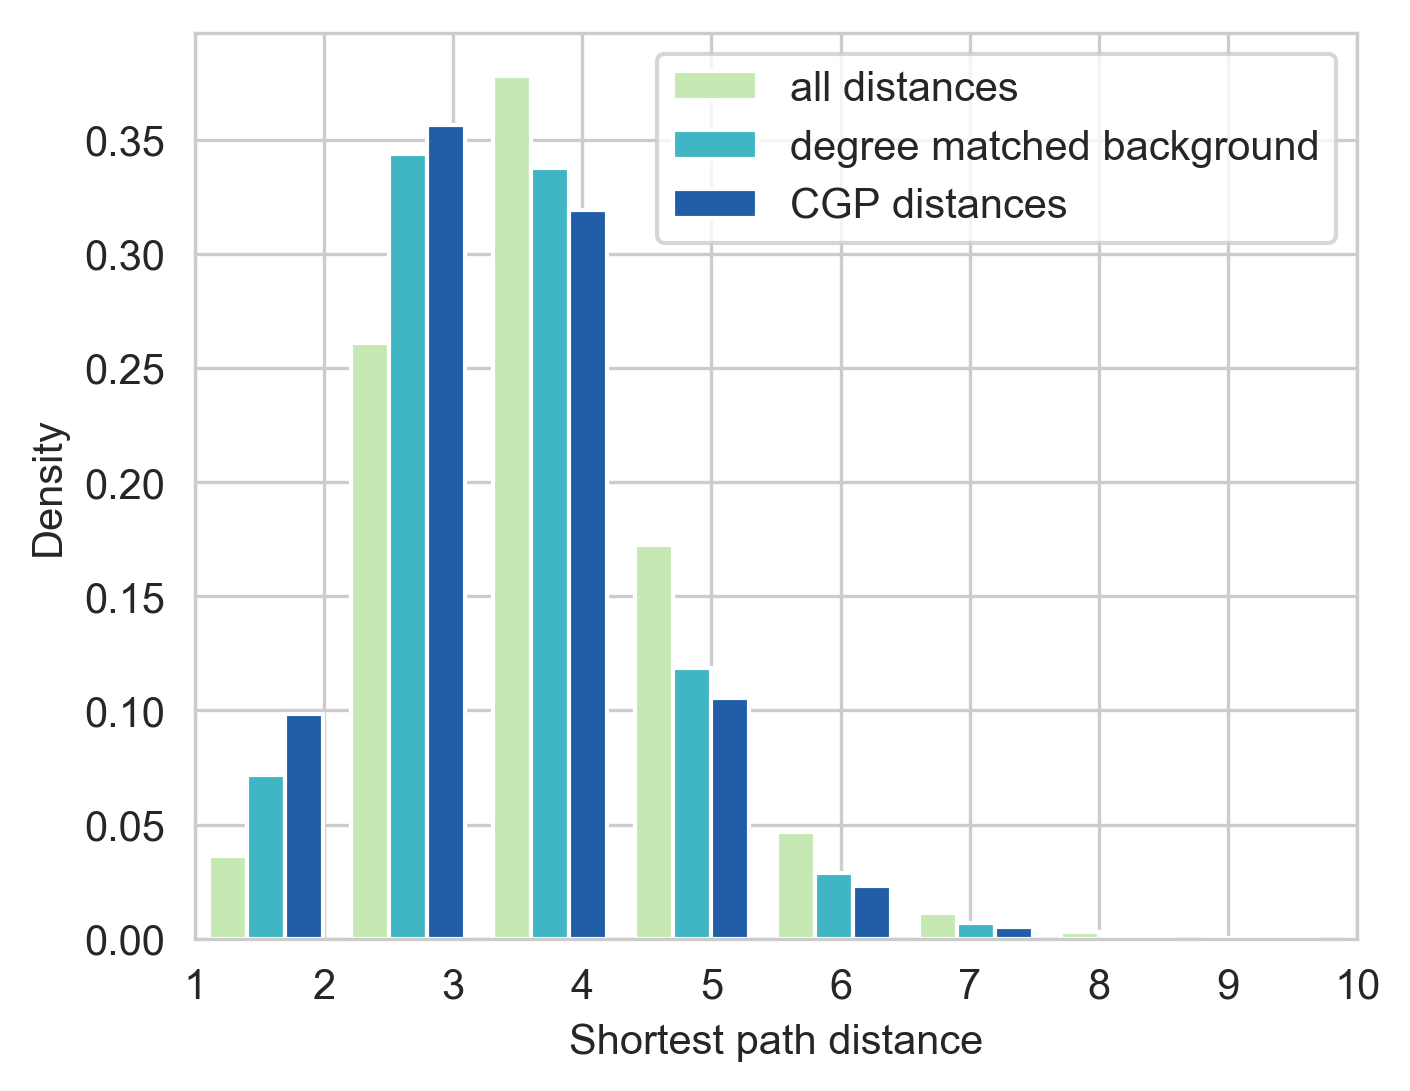

In [130]:
make_distance_distribution('SFig3F.pdf',set_name='CGP',lab_name='CGP')